In [1]:
from __future__ import absolute_import,print_function,division,unicode_literals

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import os
import time
import matplotlib.pyplot as plt

tf.__version__

D:\Anaconda3.5.20\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3.5.20\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3.5.20\envs\tensorflow2.0\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3.5.20\envs\tensorflow2.0\lib\site-packages\tensorflow\pyth

'2.0.0-beta0'

In [2]:
vocab_size = 1000
embedding_dim = 32

In [3]:
# input shape = (batch_size,sequence_length)
# output shape = (batch_size,sequence_length,embedding_dim)
embedding_layer = keras.layers.Embedding(vocab_size,embedding_dim)

In [4]:
imdb = keras.datasets.imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = vocab_size)
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [18]:
# 建立词典
word_index = imdb.get_word_index()

word_index = {k:(v + 3) for k ,v in word_index.items()}

word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNSED>"] = 3

reversed_word_index = dict([(value,key) for (key,value)  in word_index.items()])

In [19]:
def decode_review(text):
    return ' '.join([reversed_word_index.get(i,'?') for i in text])
                     
decode_review(train_data[0])

"<START> this film was just brilliant casting <UNK> <UNK> story direction <UNK> really <UNK> the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same <UNK> <UNK> as myself so i loved the fact there was a real <UNK> with this film the <UNK> <UNK> throughout the film were great it was just brilliant so much that i <UNK> the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the <UNK> <UNK> was amazing really <UNK> at the end it was so sad and you know what they say if you <UNK> at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of <UNK> and paul they were just brilliant children are often left out of the <UNK> <UNK> i think because the stars that play them all <UNK> up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what they have done don't y

In [20]:
# 补齐
max_len = 500

train_data = keras.preprocessing.sequence.pad_sequences(train_data,value = word_index["<PAD>"],padding = 'post',maxlen = max_len )
test_data = keras.preprocessing.sequence.pad_sequences(test_data,value = word_index["<PAD>"],padding = 'post',maxlen = max_len )

array([  1,  14,  22,  16,  43, 530, 973,   2,   2,  65, 458,   2,  66,
         2,   4, 173,  36, 256,   5,  25, 100,  43, 838, 112,  50, 670,
         2,   9,  35, 480, 284,   5, 150,   4, 172, 112, 167,   2, 336,
       385,  39,   4, 172,   2,   2,  17, 546,  38,  13, 447,   4, 192,
        50,  16,   6, 147,   2,  19,  14,  22,   4,   2,   2, 469,   4,
        22,  71,  87,  12,  16,  43, 530,  38,  76,  15,  13,   2,   4,
        22,  17, 515,  17,  12,  16, 626,  18,   2,   5,  62, 386,  12,
         8, 316,   8, 106,   5,   4,   2,   2,  16, 480,  66,   2,  33,
         4, 130,  12,  16,  38, 619,   5,  25, 124,  51,  36, 135,  48,
        25,   2,  33,   6,  22,  12, 215,  28,  77,  52,   5,  14, 407,
        16,  82,   2,   8,   4, 107, 117,   2,  15, 256,   4,   2,   7,
         2,   5, 723,  36,  71,  43, 530, 476,  26, 400, 317,  46,   7,
         4,   2,   2,  13, 104,  88,   4, 381,  15, 297,  98,  32,   2,
        56,  26, 141,   6, 194,   2,  18,   4, 226,  22,  21, 13

In [21]:
# 创建模型
model = keras.Sequential([
    keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_len),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           32000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 32,545
Trainable params: 32,545
Non-trainable params: 0
_________________________________________________________________


In [22]:
# 编译训练
model.compile(optimizer = keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_data,train_labels,epochs = 30,batch_size = 512,validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/30
20000/20000 [==============================] - 2s 118us/sample - loss: 0.6918 - accuracy: 0.5402 - val_loss: 0.6901 - val_accuracy: 0.5688
Epoch 2/30
20000/20000 [==============================] - 2s 86us/sample - loss: 0.6860 - accuracy: 0.5998 - val_loss: 0.6799 - val_accuracy: 0.6350
Epoch 3/30
20000/20000 [==============================] - 2s 87us/sample - loss: 0.6712 - accuracy: 0.6642 - val_loss: 0.6578 - val_accuracy: 0.7084
Epoch 4/30
20000/20000 [==============================] - 2s 85us/sample - loss: 0.6438 - accuracy: 0.7258 - val_loss: 0.6226 - val_accuracy: 0.7450
Epoch 5/30
20000/20000 [==============================] - 2s 87us/sample - loss: 0.6056 - accuracy: 0.7535 - val_loss: 0.5806 - val_accuracy: 0.7612
Epoch 6/30
20000/20000 [==============================] - 2s 84us/sample - loss: 0.5609 - accuracy: 0.7792 - val_loss: 0.5357 - val_accuracy: 0.7820
Epoch 7/30
20000/20000 [==============================] 

In [30]:
results = model.evaluate(test_data,test_labels)
# output : loss: 0.3185 - accuracy: 0.8638

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

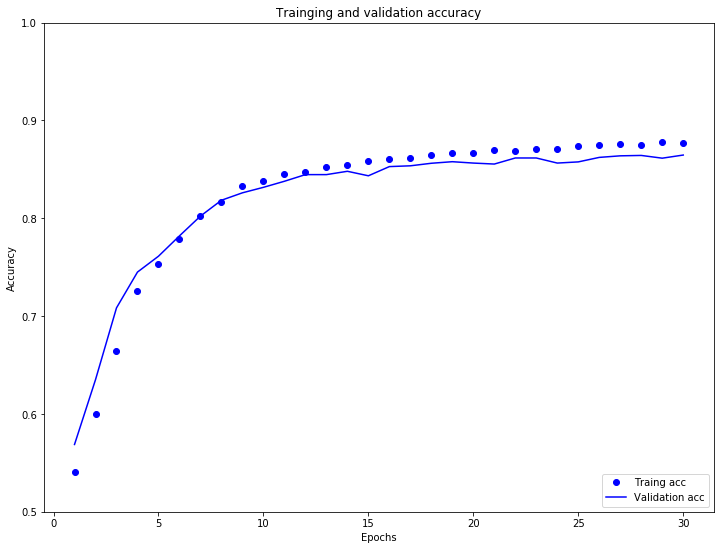

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label = 'Traing acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Trainging and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim((0.5,1))
plt.show()

In [26]:
# 词嵌入矩阵
e = model.layers[0]
weights = e.get_weights()[0]
weights.shape # (vocab_size, embedding_dim)

(1000, 32)

In [28]:
import io
# 获取vecs.tsv 和 meta.tsv
out_v = io.open('vecs.tsv','w',encoding = 'utf-8')
out_m = io.open('meta.tsv','w',encoding = 'utf-8')

for word_num in range(vocab_size):
    word = reversed_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

out_v.close()
out_m.close()

#### 将vecs.tsv 和 meta.tsv 上传到[emdedding project](https://projector.tensorflow.org)可视化学到的词嵌入

![word_embedding.png](word_embedding.png)